In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

pd.options.display.float_format = '{:,.0f}'.format

In [4]:
df = pd.read_csv('./data/REC의무공급량.csv')

In [5]:
df

,Year,의무비율,의무공급량
0,2012,2,6337942
1,2013,2,9210381
2,2014,3,11578809
3,2015,3,12339927
4,2016,4,15084497
5,2017,4,17043864
6,2018,5,21999611
7,2019,6,26957761
8,2020,7,35588932
9,2021,9,47101564


In [6]:
rec_train = df[df['Year'] < 2022]
rec_pred = df[df['Year'] >= 2022]

X_train = rec_train[['Year', '의무비율']]
y_train = rec_train[['의무공급량']]

X_pred = rec_pred[['Year', '의무비율']]

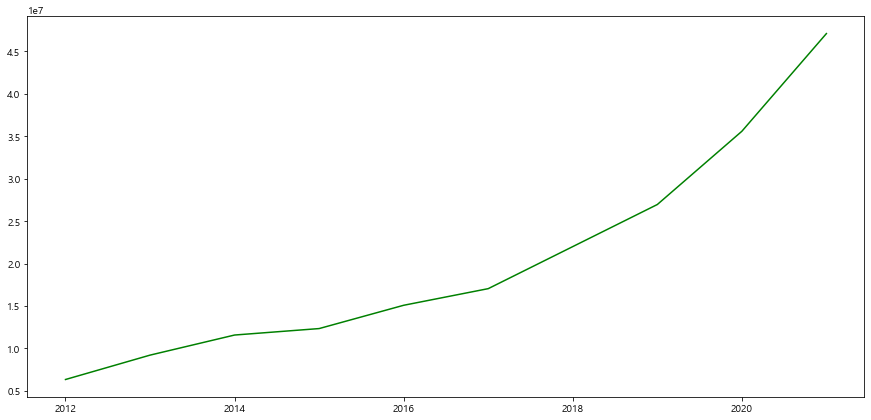

In [7]:
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.plot(rec_train.Year, rec_train.의무공급량, color='g')

In [36]:
poly = PolynomialFeatures(degree=2)
train_poly = poly.fit_transform(X_train)
poly.fit(train_poly, y_train) 

model = LinearRegression() 
model.fit(train_poly, y_train)
print("Model Score", model, ': ', model.score(poly.fit_transform(X_train), y_train))  

Model Score LinearRegression() :  0.9985011528378287


In [37]:
predicted = model.predict(poly.fit_transform(X_pred))
predicted

array([[55881671.17431641],
       [60637769.51953125]])

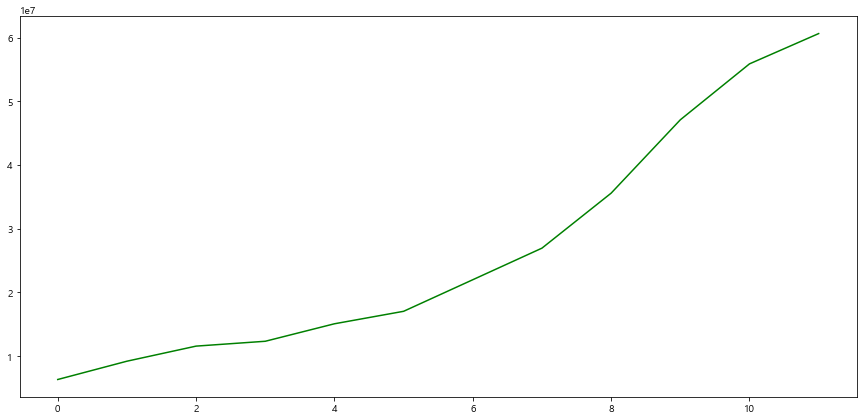

In [38]:
rec_prediction = df.copy()
rec_prediction = rec_prediction[['Year', '의무공급량']]
rec_prediction.iloc[10:, 1] = predicted

plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.plot(rec_prediction.index, rec_prediction.의무공급량, color='g')

In [39]:
rec_prediction

,Year,의무공급량
0,2012,"6,337,942"
1,2013,"9,210,381"
2,2014,"11,578,809"
3,2015,"12,339,927"
4,2016,"15,084,497"
5,2017,"17,043,864"
6,2018,"21,999,611"
7,2019,"26,957,761"
8,2020,"35,588,932"
9,2021,"47,101,564"
